![Astrofisica Computacional](../logo.PNG)

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

---
# Ejercicio 01. Datos en Astrophysics


### A. Descargando datos del SDSS
Escriba una busqueda en SQL que permita encontrar en el SDSS (DS17), utilizando las tablas PhotoObj y SpecObj, los objetos localizados en la región con ascención recta entre 140.9 y 141.1, que tengan un brillo en la banda g mayor a 18.0 y con un corrimiento al rojo (SpecObj) mayor que 0.1. Realice la conexión entre las dos tablas a través de objid (PhotoObj) y bestobjid (SpecObj) y obtenga las siguientes características: 

- Object ID (PhotoObj)
- ra 
- dec
- las 5 mahgnitudes u,g,r,i,z 
- specobjid (SpecObj)
- z o redhsift (SepcObj)
- class

Descargue los resultados en un archivo de formato `.csv`.

**Solución**

La busqueda que da como resultado los objetos requeridos es:
```
SELECT 
   p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
   s.specobjid, s.class, s.z as redshift
FROM PhotoObj AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE
   p.ra BETWEEN 140.9 AND 141.1
   AND p.g < 20.0
   AND s.z > 0.
```

---
### B. Análisis de los Datos obtenidos

1. Escriba un código que lea el archivo de datos descargado y determine el número de objetos obtenidos. Verifique que no existen objetos de la clase espectral 'STAR' y determine cuantos objetos son 'GALAXY' y cuantos 'QSO'. Verifique que no existen datos faltantes.

2. Realice 5 grtáficas mostrando el redshift (eje vertical) vs. cada una de las magnitudes en las bandas u,g,r,i,z (ejes horizontales). En cada una de ellas identifique con color rojo las galaxias y con azul los quasars.

3. Identifique y presenta la información de la galaxia con el redshift mas alto y del quasar con el redshift mas pequeño.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('sc.csv', header=1)
data

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift
0,1237651192435441806,140.969414,58.330917,19.51210,17.52717,16.50917,16.06315,15.71767,509004096733210624,GALAXY,0.111751
1,1237651537629282372,140.994985,58.818392,17.06698,16.72158,16.65561,16.66703,16.63705,9230396665483253760,QSO,0.709347
2,1237651753456435386,141.091250,1.500465,19.10424,17.21032,16.13471,15.68083,15.31320,532561133660301312,GALAXY,0.137940
3,1237654604243665087,141.094626,2.707625,19.55226,17.95411,17.08887,16.64958,16.33307,639571108286195712,GALAXY,0.133001
4,1237654651496104139,140.950789,50.069564,18.82008,16.93399,15.97335,15.55369,15.22008,862448712188717056,GALAXY,0.101171
...,...,...,...,...,...,...,...,...,...,...,...
96,1237667781205753978,140.989168,15.382589,19.52588,17.38504,16.11612,15.62376,15.28591,2747345370332817408,GALAXY,0.179595
97,1237667783353434373,141.027118,17.146187,19.39386,17.63808,16.60863,16.15684,15.75617,2666227799475382272,GALAXY,0.115307
98,1237668288540639614,141.019079,14.133897,19.59936,17.50262,16.37452,15.91643,15.52519,5976471969096554496,GALAXY,0.136401
99,1237671124837073170,141.067942,13.253102,19.36394,17.33337,16.35837,15.93551,15.60443,2902676681137350656,GALAXY,0.111353


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Skyserver_data.csv', header=1)
data

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift
0,1237654382515912884,140.906854,54.297534,18.78814,16.98447,16.07627,15.65547,15.32093,624954475785775104,GALAXY,0.126928
1,1237654383589982372,141.030592,55.299446,19.77112,18.25294,17.48941,17.07491,16.76008,623900039671998464,GALAXY,0.100919
2,1237654383589982393,141.067988,55.365819,19.62794,18.49739,17.84036,17.47652,17.20669,624980039431120896,GALAXY,0.120312
3,1237655109440766053,141.065339,52.458250,19.18195,18.12457,17.46571,17.09415,16.84519,863667246034085888,GALAXY,0.130058
4,1237657402420429025,140.903940,46.646520,19.36081,18.10286,17.43817,17.07351,16.84289,937977465559607296,GALAXY,0.125796
...,...,...,...,...,...,...,...,...,...,...,...
760,1237674459878785179,141.082118,2.441734,21.15558,18.95888,17.71109,17.19715,16.80971,532716989433538560,GALAXY,0.170038
761,1237653614796210202,140.986476,55.492719,21.39506,19.03143,17.86234,17.30175,16.94986,624980314309027840,GALAXY,0.147477
762,1237667486457331870,140.997556,18.860345,19.35230,17.83548,16.96248,16.54806,16.20710,2657242589949880320,GALAXY,0.130452
763,1237667538003558505,141.043965,18.711148,20.26572,19.51773,19.35889,19.29990,19.28207,6493169870896912384,QSO,2.682130


In [2]:
data.describe()

,objid,ra,dec,u,g,r,i,z,specobjid,redshift
count,7.650000e+02,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,7.650000e+02,765.000000
mean,1.237661e+18,140.998460,29.312568,20.311017,18.755093,17.885856,17.497565,17.215575,3.360285e+18,0.519378
std,6.031586e+12,0.059771,19.391247,1.082622,0.704764,0.945977,1.012618,1.087501,3.200194e+18,0.725489
min,1.237649e+18,140.900106,-2.546645,16.281080,16.370370,15.491740,15.189280,14.537030,5.077823e+17,0.100388
25%,1.237658e+18,140.943686,12.680223,19.589860,18.258580,17.356040,16.888980,16.562310,1.115913e+18,0.137034
50%,1.237661e+18,140.998976,28.552908,20.209520,18.761560,17.703370,17.248850,16.912050,2.182016e+18,0.187749
75%,1.237665e+18,141.051383,44.599363,20.933610,19.288090,18.345870,17.989050,17.634070,5.287339e+18,0.317053
max,1.237674e+18,141.099921,67.692245,26.516290,19.993470,29.029320,24.362770,21.694990,1.412694e+19,3.512214


In [3]:
data['class'].value_counts()

GALAXY    576
QSO       189
Name: class, dtype: int64

 Se tienen 765 objetos catalogados, de los cuales 576 son GALAXIAS y 189 son QUASARS.

In [4]:
data['color'] = 'crimson'
data.loc[data['class'] == 'QSO', 'color'] = 'cornflowerblue'
data

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,color
0,1237654382515912884,140.906854,54.297534,18.78814,16.98447,16.07627,15.65547,15.32093,624954475785775104,GALAXY,0.126928,crimson
1,1237654383589982372,141.030592,55.299446,19.77112,18.25294,17.48941,17.07491,16.76008,623900039671998464,GALAXY,0.100919,crimson
2,1237654383589982393,141.067988,55.365819,19.62794,18.49739,17.84036,17.47652,17.20669,624980039431120896,GALAXY,0.120312,crimson
3,1237655109440766053,141.065339,52.458250,19.18195,18.12457,17.46571,17.09415,16.84519,863667246034085888,GALAXY,0.130058,crimson
4,1237657402420429025,140.903940,46.646520,19.36081,18.10286,17.43817,17.07351,16.84289,937977465559607296,GALAXY,0.125796,crimson
...,...,...,...,...,...,...,...,...,...,...,...,...
760,1237674459878785179,141.082118,2.441734,21.15558,18.95888,17.71109,17.19715,16.80971,532716989433538560,GALAXY,0.170038,crimson
761,1237653614796210202,140.986476,55.492719,21.39506,19.03143,17.86234,17.30175,16.94986,624980314309027840,GALAXY,0.147477,crimson
762,1237667486457331870,140.997556,18.860345,19.35230,17.83548,16.96248,16.54806,16.20710,2657242589949880320,GALAXY,0.130452,crimson
763,1237667538003558505,141.043965,18.711148,20.26572,19.51773,19.35889,19.29990,19.28207,6493169870896912384,QSO,2.682130,cornflowerblue


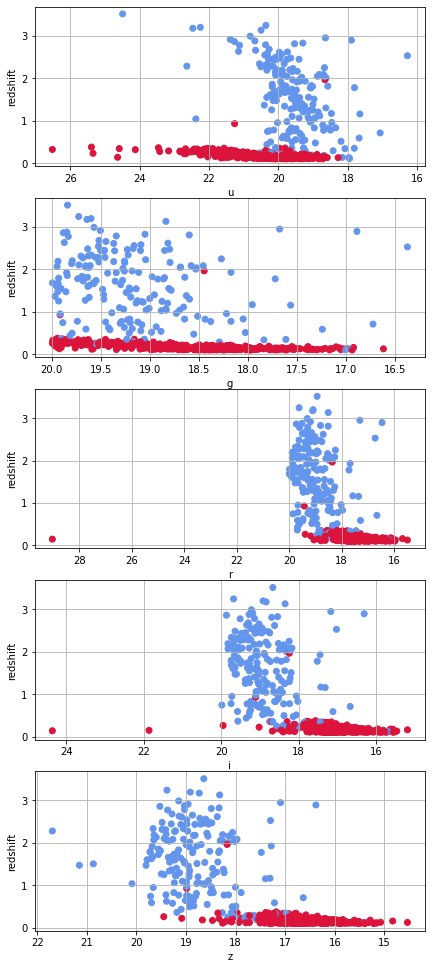

In [6]:
fig, ax = plt.subplots(5,1, figsize=(7,17))
ax[0].scatter(data['u'], data['redshift'], color=data['color'])
ax[0].set_xlabel('u')
ax[0].set_ylabel('redshift')
ax[0].invert_xaxis()
ax[0].grid()

ax[1].scatter(data['g'], data['redshift'], color=data['color'])
ax[1].set_xlabel('g')
ax[1].set_ylabel('redshift')
ax[1].invert_xaxis()
ax[1].grid()

ax[2].scatter(data['r'], data['redshift'], color=data['color'])
ax[2].set_xlabel('r')
ax[2].set_ylabel('redshift')
ax[2].invert_xaxis()
ax[2].grid()

ax[3].scatter(data['i'], data['redshift'], color=data['color'])
ax[3].set_xlabel('i')
ax[3].set_ylabel('redshift')
ax[3].invert_xaxis()
ax[3].grid()

ax[4].scatter(data['z'], data['redshift'], color=data['color'])
ax[4].set_xlabel('z')
ax[4].set_ylabel('redshift')
ax[4].invert_xaxis()
ax[4].grid()

plt.show()

La galaxia con el mas alto redshift es

In [7]:
galaxy_maxredshift = data[data['class']=='GALAXY'].max()['redshift']
galaxy_maxredshift

1.963634

In [8]:
data.loc[data['redshift']==galaxy_maxredshift]

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,color
291,1237650794607149105,141.002295,-1.162619,18.65775,18.4443,18.35764,18.23983,18.17272,14124451864557934592,GALAXY,1.963634,crimson


El quasar con el redshift mas bajo es

In [9]:
qso_minredshift = data[data['class']=='QSO'].min()['redshift']
qso_minredshift

0.1065004

In [10]:
data.loc[data['redshift']==qso_minredshift]

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,color
338,1237660765916496041,141.087865,36.893822,17.94765,17.00332,16.31914,15.88601,15.66677,1434507582239696896,QSO,0.1065,cornflowerblue


### C. Índices de Color

1. Defina columnas en el dataframe con los índices de color `u-g`, `g-i`, `r-i` e `i-z` para cada uno de los objetos.

2. Realice 4 gráficas mostrando el redshift (eje vertical) vs. cada uno de los índices de color, identificando con color rojo las galaxias y con azul los quasars.

3. Realice una gráfica mostrando el índice de color `r-i` (eje vertical) vs. índice de color `u-g` (eje horizontal) e indicando el valor de redshift para cada objeto con una escala de color. Puede identificar algún(os) objeto(s) ailslado(s) de la tendencia? Que interpretación daría para este comportamiento? 

In [11]:
data['u-g'] = data['u']-data['g']
data['g-i'] = data['g']-data['i']
data['r-i'] = data['r']-data['i']
data['i-z'] = data['i']-data['z']
data

,objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,color,u-g,g-i,r-i,i-z
0,1237654382515912884,140.906854,54.297534,18.78814,16.98447,16.07627,15.65547,15.32093,624954475785775104,GALAXY,0.126928,crimson,1.80367,1.32900,0.42080,0.33454
1,1237654383589982372,141.030592,55.299446,19.77112,18.25294,17.48941,17.07491,16.76008,623900039671998464,GALAXY,0.100919,crimson,1.51818,1.17803,0.41450,0.31483
2,1237654383589982393,141.067988,55.365819,19.62794,18.49739,17.84036,17.47652,17.20669,624980039431120896,GALAXY,0.120312,crimson,1.13055,1.02087,0.36384,0.26983
3,1237655109440766053,141.065339,52.458250,19.18195,18.12457,17.46571,17.09415,16.84519,863667246034085888,GALAXY,0.130058,crimson,1.05738,1.03042,0.37156,0.24896
4,1237657402420429025,140.903940,46.646520,19.36081,18.10286,17.43817,17.07351,16.84289,937977465559607296,GALAXY,0.125796,crimson,1.25795,1.02935,0.36466,0.23062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,1237674459878785179,141.082118,2.441734,21.15558,18.95888,17.71109,17.19715,16.80971,532716989433538560,GALAXY,0.170038,crimson,2.19670,1.76173,0.51394,0.38744
761,1237653614796210202,140.986476,55.492719,21.39506,19.03143,17.86234,17.30175,16.94986,624980314309027840,GALAXY,0.147477,crimson,2.36363,1.72968,0.56059,0.35189
762,1237667486457331870,140.997556,18.860345,19.35230,17.83548,16.96248,16.54806,16.20710,2657242589949880320,GALAXY,0.130452,crimson,1.51682,1.28742,0.41442,0.34096
763,1237667538003558505,141.043965,18.711148,20.26572,19.51773,19.35889,19.29990,19.28207,6493169870896912384,QSO,2.682130,cornflowerblue,0.74799,0.21783,0.05899,0.01783


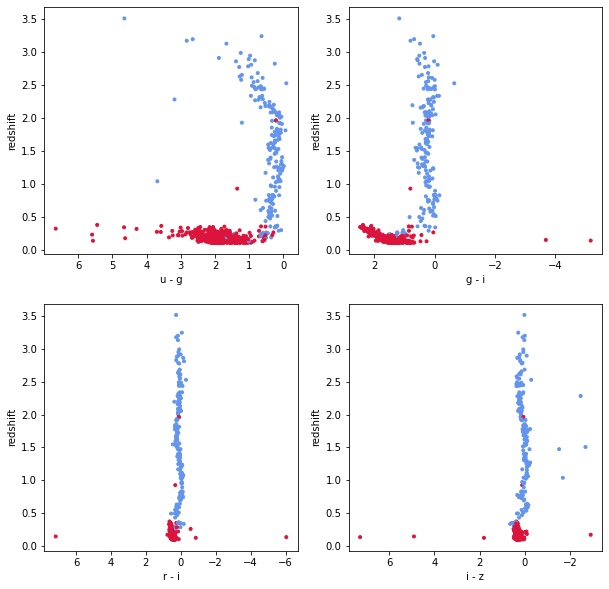

In [12]:
# Plot of the color indices u-g, g-i, r-i and i-z vs redshift
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].scatter(data['u-g'], data['redshift'], color=data['color'], marker='.')
ax[0,0].invert_xaxis()
ax[0,1].scatter(data['g-i'], data['redshift'], color=data['color'], marker='.')
ax[0,1].invert_xaxis()
ax[1,0].scatter(data['r-i'], data['redshift'], color=data['color'], marker='.')
ax[1,0].invert_xaxis()
ax[1,1].scatter(data['i-z'], data['redshift'], color=data['color'], marker='.')
ax[1,1].invert_xaxis()

ax[0,0].set_ylabel(r'redshift')
ax[0,0].set_xlabel(r'u - g')
ax[0,1].set_ylabel(r'redshift')
ax[0,1].set_xlabel(r'g - i')
ax[1,0].set_ylabel(r'redshift')
ax[1,0].set_xlabel(r'r - i')
ax[1,1].set_ylabel(r'redshift')
ax[1,1].set_xlabel(r'i - z')

plt.show()

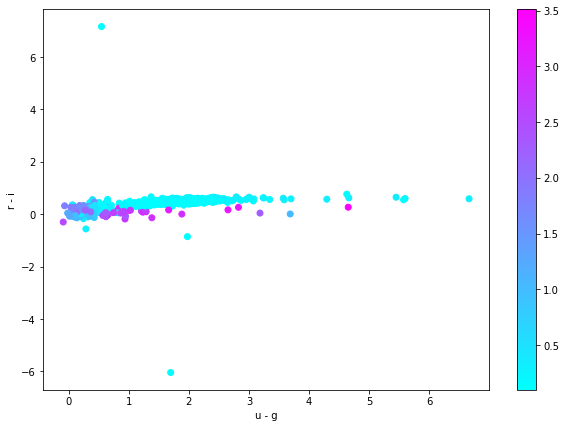

In [71]:
cmap1 = plt.get_cmap('cool')
plt.figure(figsize=(10,7))
plt.scatter(data['u-g'],data['r-i'], c=data['redshift'], cmap=cmap1)
plt.ylabel(r'r - i')
plt.xlabel(r'u - g')
plt.colorbar()
plt.show()